In [ ]:
from google.colab import files
uploaded = files.upload()


Saving final_internship_data.csv to final_internship_data.csv


In [ ]:

import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['final_internship_data.csv']))


NameError: name 'df' is not defined

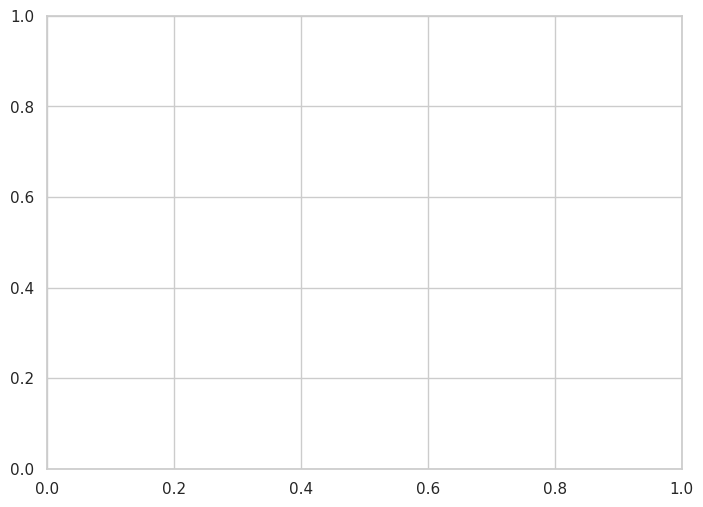

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

# إعدادات الشكل
sns.set(style="whitegrid")
plt.figure(figsize=(18, 20))

# 1. Car Condition
plt.subplot(3, 2, 1)
sns.countplot(data=df, x="Car Condition", order=df["Car Condition"].value_counts().index, palette="Set2")
plt.title("Car Condition Distribution")
plt.xlabel("Car Condition")
plt.ylabel("Count")

# 2. Weather
plt.subplot(3, 2, 2)
sns.countplot(data=df, x="Weather", order=df["Weather"].value_counts().index, palette="coolwarm")
plt.title("Weather Distribution")
plt.xlabel("Weather")
plt.ylabel("Count")

# 3. Traffic Condition
plt.subplot(3, 2, 3)
sns.countplot(data=df, x="Traffic Condition", order=df["Traffic Condition"].value_counts().index, palette="Set3")
plt.title("Traffic Condition Distribution")
plt.xlabel("Traffic Condition")
plt.ylabel("Count")

# 4. Passenger Count
plt.subplot(3, 2, 4)
sns.countplot(data=df, x="passenger_count", palette="viridis")
plt.title("Passenger Count Distribution")
plt.xlabel("Passenger Count")
plt.ylabel("Count")

# 5. Fare Amount
plt.subplot(3, 2, 5)
sns.histplot(df["fare_amount"], bins=50, kde=True, color="green")
plt.title("Fare Amount Distribution")
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")

# 6. Distance
plt.subplot(3, 2, 6)
sns.histplot(df["distance"].dropna(), bins=50, kde=True, color="orange")
plt.title("Trip Distance Distribution")
plt.xlabel("Distance")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


/tmp/ipython-input-4-1963459378.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Weather', y='fare_amount', palette='Set3')


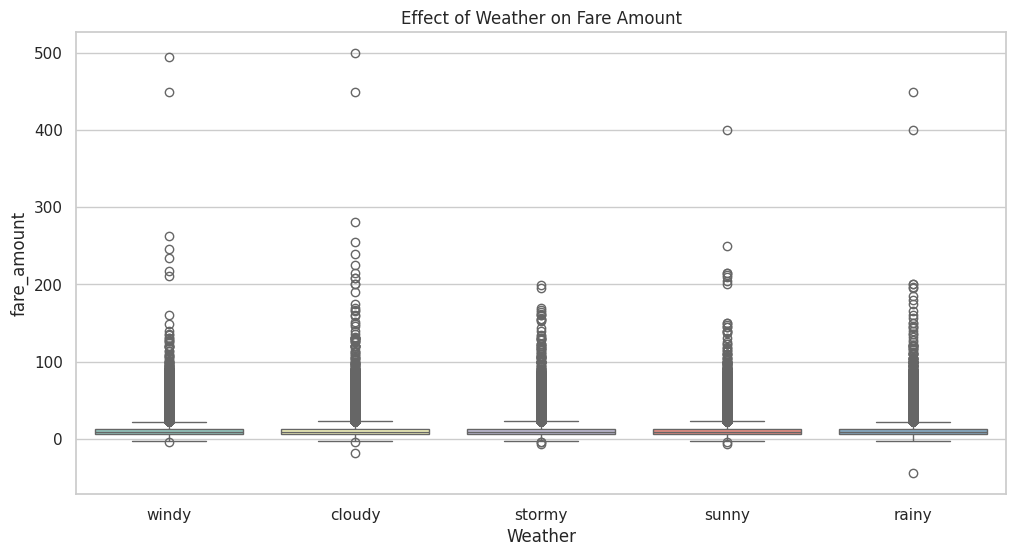

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Weather', y='fare_amount', palette='Set3')
plt.title("Effect of Weather on Fare Amount")
plt.show()


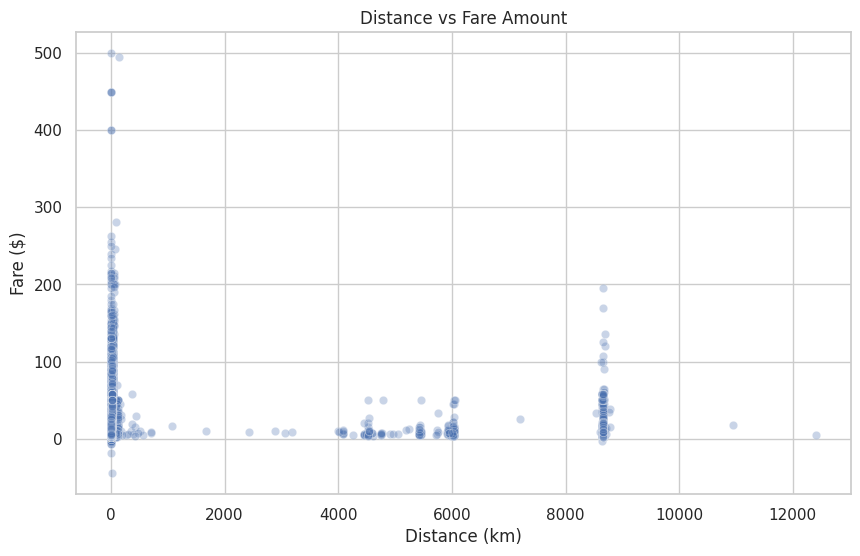

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='distance', y='fare_amount', alpha=0.3)
plt.title("Distance vs Fare Amount")
plt.xlabel("Distance (km)")
plt.ylabel("Fare ($)")
plt.show()


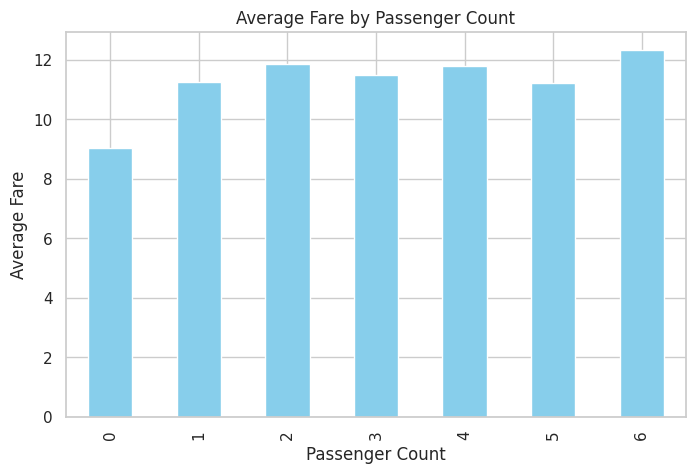

In [ ]:
df.groupby("passenger_count")["fare_amount"].mean().plot(kind='bar', color='skyblue', figsize=(8,5))
plt.title("Average Fare by Passenger Count")
plt.ylabel("Average Fare")
plt.xlabel("Passenger Count")
plt.show()


In [ ]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['day_of_week'] = df['pickup_datetime'].dt.day_name()


In [ ]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])


In [ ]:
df['day_name'] = df['pickup_datetime'].dt.day_name()


In [ ]:
df['month_name'] = df['pickup_datetime'].dt.month_name()


In [ ]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df['pickup_datetime'].dt.month.apply(get_season)


/tmp/ipython-input-12-3702020717.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='day_name', y='fare_amount', order=order, estimator=np.mean, palette='coolwarm')


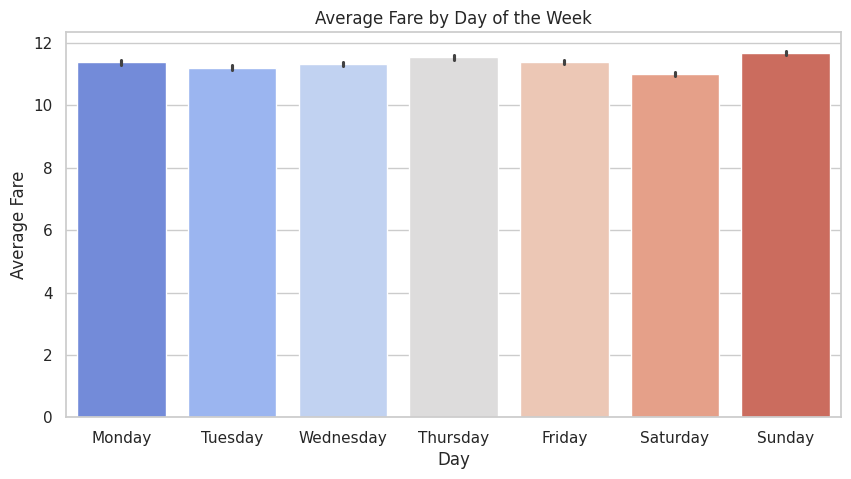

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(data=df, x='day_name', y='fare_amount', order=order, estimator=np.mean, palette='coolwarm')
plt.title("Average Fare by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Average Fare")
plt.show()


/tmp/ipython-input-13-1871419773.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='season', y='fare_amount', order=season_order, palette='Set2')


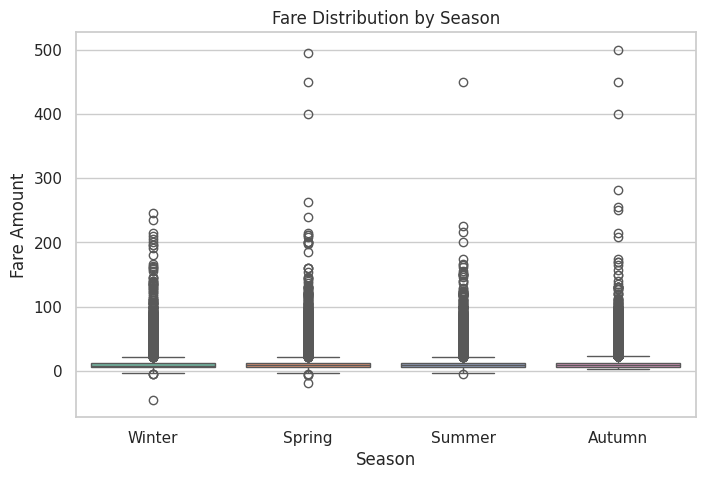

In [ ]:
plt.figure(figsize=(8, 5))
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
sns.boxplot(data=df, x='season', y='fare_amount', order=season_order, palette='Set2')
plt.title("Fare Distribution by Season")
plt.xlabel("Season")
plt.ylabel("Fare Amount")
plt.show()


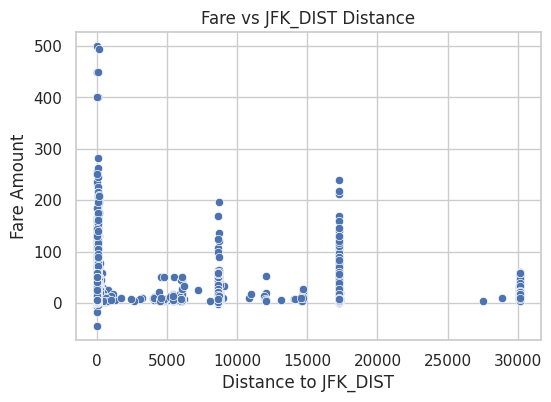

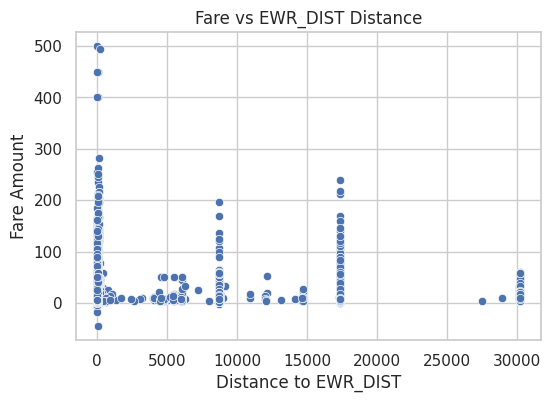

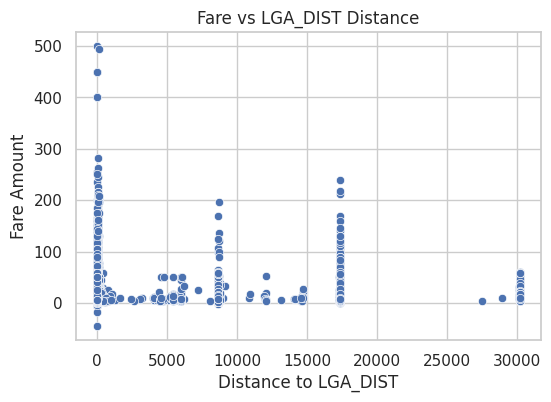

In [ ]:
airports = ['jfk_dist', 'ewr_dist', 'lga_dist']

for airport in airports:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=airport, y='fare_amount')
    plt.title(f"Fare vs {airport.upper()} Distance")
    plt.xlabel(f"Distance to {airport.upper()}")
    plt.ylabel("Fare Amount")
    plt.show()


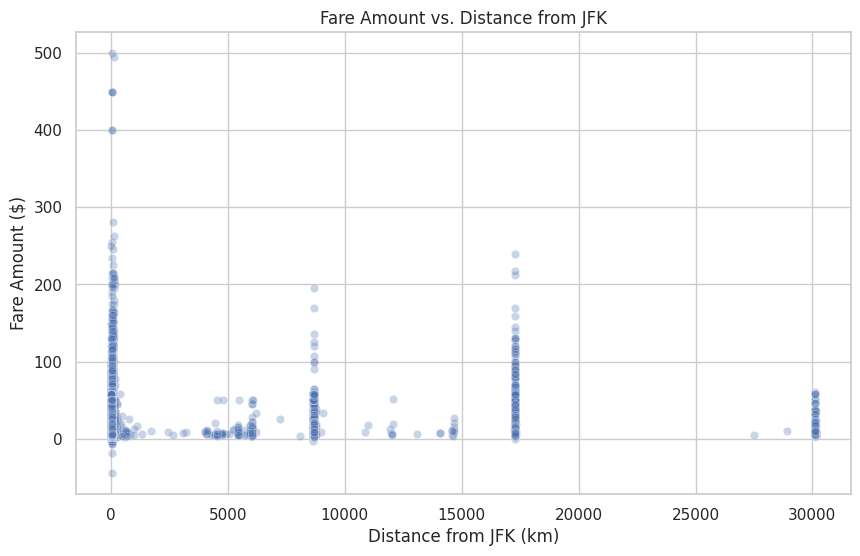

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='jfk_dist', y='fare_amount', alpha=0.3)
plt.title('Fare Amount vs. Distance from JFK')
plt.xlabel('Distance from JFK (km)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()


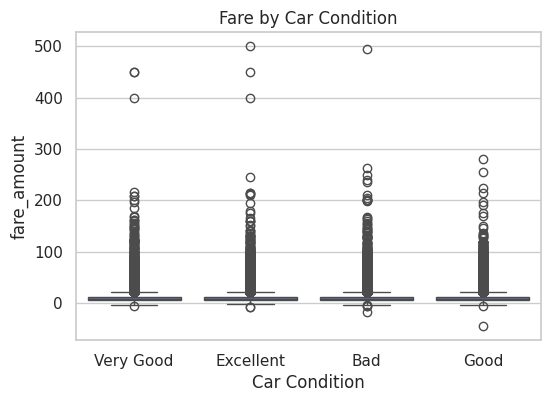

In [ ]:
if 'Car Condition' in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='Car Condition', y='fare_amount')
    plt.title("Fare by Car Condition")
    plt.show()


ValueError: Contour levels must be increasing

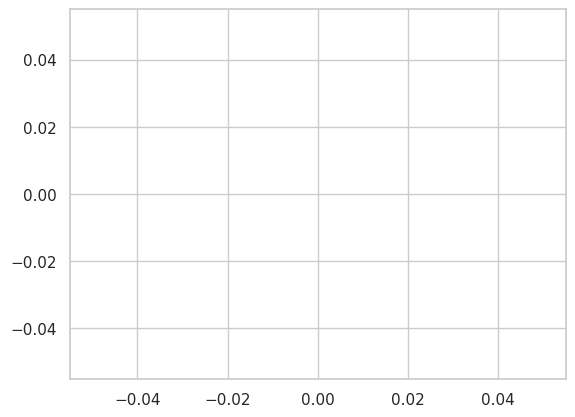

In [ ]:
sns.kdeplot(x=df['dropoff_longitude'], y=df['dropoff_latitude'], cmap="Blues", fill=True, bw_adjust=0.5)
plt.title("Dropoff Density Map")
